In [2]:
import os
# import mkl
import time
import scipy
import skimage
from skimage import color
from nuscenes.nuscenes import NuScenes
from scipy.interpolate import LinearNDInterpolator
import numpy as np
from tqdm import tqdm
import PIL
from PIL import Image
import torch
import matplotlib.pyplot as plt
import nusc_loader

In [3]:
dataloader = nusc_loader.NuScenesLoader(scene_token_list='/projects/DORN_radar_github/list/nusc/train_scene.txt')

read list from /projects/DORN_radar_github/list/nusc/train_scene.txt
765
Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 48.2 seconds.
Reverse indexing ...
Done reverse indexing in 16.9 seconds.
mode: train with 30731 samples


In [4]:
train_loader = torch.utils.data.DataLoader(dataloader, batch_size=3, shuffle=True, num_workers=3)

In [7]:
for i, data in enumerate(train_loader):
    if i == 1:
        break
             
radar = data['RADAR'][0].cpu().detach().numpy()[0]
RGB = data['RGB'][0].cpu().detach().numpy()
sparse = data['SPARSE'][0].cpu().detach().numpy()[0]
dense = data['DENSE'][0].cpu().detach().numpy()[0]

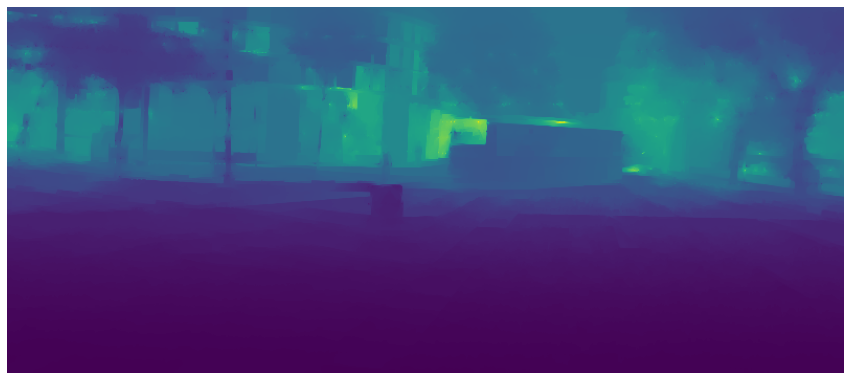

In [11]:
plt.figure(figsize=(15, 10))
plt.imshow(np.asarray(dense))
plt.axis('off');